In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data from data/transactions.csv
transactions_df = pd.read_csv('data/transactions-5.csv')

# show summary statistics
transactions_df.describe()

,nonce,block_number,transaction_index,gas,gas_price,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,max_fee_per_blob_gas,blob_versioned_hashes
count,282338.000000,282338.000000,282338.000000,2.823380e+05,2.823380e+05,2.823380e+05,0.0,0.0,282338.0,0.0,0.0
mean,20738.335499,524565.793928,11.132317,1.956950e+05,5.347484e+10,1.447256e+09,NaN,NaN,0.0,NaN,NaN
std,29987.608263,51962.887960,26.660118,5.498807e+05,1.217180e+11,8.867271e+05,NaN,NaN,0.0,NaN,NaN
min,0.000000,430003.000000,0.000000,2.100000e+04,4.500000e+10,1.445648e+09,NaN,NaN,0.0,NaN,NaN
25%,153.000000,482376.500000,0.000000,2.100000e+04,5.000000e+10,1.446536e+09,NaN,NaN,0.0,NaN,NaN
50%,6473.000000,523130.000000,1.000000,4.100000e+04,5.000000e+10,1.447232e+09,NaN,NaN,0.0,NaN,NaN
75%,27827.000000,567991.500000,5.000000,9.000000e+04,5.000000e+10,1.447994e+09,NaN,NaN,0.0,NaN,NaN
max,107355.000000,617918.000000,148.000000,3.141592e+06,5.000000e+13,1.448856e+09,NaN,NaN,0.0,NaN,NaN


In [3]:
# create a copy of the df to explore and manipulate #
df = transactions_df.copy()

# print(df.info())
# df.head()

In [4]:
# explore wallets that receive lots of transactions:

# print(f"Number of unique to_addresses: {df['to_address'].nunique()}")
# print(f"Number of transactions in data set: {df['hash'].nunique()}")
# print(f"Frequency of to_addresses: \n{df['to_address'].value_counts()}")

# to_address 0x32be343b94f860124dc4fee278fdcbd38c102d88 has 38797 transactions
counts = df['to_address'].value_counts()
percentiles = counts.quantile([0.25, 0.5, 0.75])
# print(f"To address frequency percentiles:\n{percentiles}")


In [5]:
## Exploring value

# print(df['value'][:5])
# print("Counts of transactions for specified values:")
# print(df['value'].value_counts())
# print(f"Data type of values: {type(df['value'][0])}")
# print(f"Max Value: {df['value'].max()}\n")

# Need to convert value to float
df['value'] = df['value'].astype(float)
# print(f"Data type of converted values: {type(df['value'][0])}")

# What are the units for value? - values reported in WEI = 1/10^18 Ethereum

# creating value_ether feature
df['value_ether'] = df['value'] / (10 ** 18)
# print(f"Max Value of Ether traded: {df['value_ether'].max()}")
# print(f"Min Value of Ether traded: {df['value_ether'].min()}")

In [6]:
# Create new features based on frequency and value of transactions
from_frequency = df['from_address'].value_counts()
to_frequency = df['to_address'].value_counts()

# Create new features based on total value of transactions
from_val_total = df.groupby('from_address')['value_ether'].sum()
to_val_total = df.groupby('to_address')['value_ether'].sum()

# Create new dataframe with frequency and value features
transaction_freq = pd.DataFrame({
    'from_frequency': from_frequency,
    'to_frequency': to_frequency,
    'from_val_total': from_val_total,
    'to_val_total': to_val_total
}).fillna(0)

# Create new feature for total frequency of transactions
transaction_freq['total_frequency'] = transaction_freq['from_frequency'] + transaction_freq['to_frequency']
transaction_freq['avg_value_sent'] = (transaction_freq['from_val_total'] / transaction_freq['from_frequency']).fillna(0)
transaction_freq['avg_value_received'] = (transaction_freq['to_val_total'] / transaction_freq['to_frequency']).fillna(0)


# Generating statistic metrics for full dataset 

## These metrics include values of 0 for sent/received ##
# print("Metrics for average value sent across full dataset:")
# print(transaction_freq['avg_value_sent'].describe())

# print("\nMetrics for average value received across full dataset:")
# print(transaction_freq['avg_value_received'].describe())
#########################################################

# print("Metrics for average value sent across full dataset, excluding sent values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_value_sent'] != 0]
mean_avg_sent = filtered_df['avg_value_sent'].mean()
quantiles_avg_sent = filtered_df['avg_value_sent'].quantile([0.25, 0.5, 0.75])
avg_value_sent_min = filtered_df['avg_value_sent'].min()
avg_value_sent_max = filtered_df['avg_value_sent'].max()

# print(f"Mean avg_value_sent: {mean_avg_sent}")
# print(f"Quartiles of avg_value_sent:\n{quantiles_avg_sent}")
# print(f"Min avg_value_sent: {avg_value_sent_min}")
# print(f"Max avg_value_sent: {avg_value_sent_max}")


# print("\nMetrics for average value received across full dataset, excluding received values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_value_received'] != 0]
mean_avg_received = filtered_df['avg_value_received'].mean()
quantiles_avg_received = filtered_df['avg_value_received'].quantile([0.25, 0.5, 0.75])
avg_value_rec_min = filtered_df['avg_value_received'].min()
avg_value_rec_max = filtered_df['avg_value_received'].max()

# print(f"Mean avg_value_received: {mean_avg_received}")
# print(f"Quartiles of avg_value_received:\n{quantiles_avg_received}")
# print(f"Min avg_value_received: {avg_value_rec_min}")
# print(f"Max avg_value_received: {avg_value_rec_max}")

# Generate average transaction frequencies
# print("\n")
# print("Average number of transactions sent: ", transaction_freq['from_frequency'].mean())
# print("Average number of transactions received: ", transaction_freq['to_frequency'].mean())




# Create new features based on total gas for transactions
transaction_freq['from_gas_total'] = df.groupby('from_address')['gas'].sum()
transaction_freq['to_gas_total'] = df.groupby('to_address')['gas'].sum()

# Create new features for gas
transaction_freq['avg_gas_sent'] = df.groupby('from_address')['gas'].mean()
transaction_freq['avg_gas_price_sent'] = df.groupby('from_address')['gas_price'].mean() / (10**18) # converts GWEI to ETH
transaction_freq['avg_gas_received'] = df.groupby('to_address')['gas'].mean()
transaction_freq['avg_gas_price_received'] = df.groupby('to_address')['gas_price'].mean() / (10**18) # converts GWEI to ETH

transaction_freq.fillna(0, inplace=True)



# print("\nMetrics for average gas price sent across full dataset, excluding sent values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_gas_price_sent'] != 0]
mean_avg_gasprice_sent = filtered_df['avg_gas_price_sent'].mean()
quantiles_avg_gasprice_sent = filtered_df['avg_gas_price_sent'].quantile([0.25, 0.5, 0.75])
avg_gasprice_sent_min = filtered_df['avg_gas_price_sent'].min()
avg_gasprice_sent_max = filtered_df['avg_gas_price_sent'].max()

# print(f"Mean average gas_price sent: {mean_avg_gasprice_sent}")
# print(f"Quartiles of avg_gasprice_sent:\n{quantiles_avg_gasprice_sent}")
# print(f"Min avg_gasprice_sent: {avg_gasprice_sent_min}")
# print(f"Max avg_gasprice_sent: {avg_gasprice_sent_max}")


# print("\nMetrics for average gas price received across full dataset, excluding received values of 0:")
filtered_df = transaction_freq[transaction_freq['avg_gas_price_received'] != 0]
mean_avg_gasprice_received = filtered_df['avg_gas_price_received'].mean()
quantiles_avg_gasprice_received = filtered_df['avg_gas_price_received'].quantile([0.25, 0.5, 0.75])
avg_gasprice_rec_min = filtered_df['avg_gas_price_received'].min()
avg_gasprice_rec_max = filtered_df['avg_gas_price_received'].max()

# print(f"Mean average gas_price received: {mean_avg_gasprice_received}")
# print(f"Quartiles of avg_gasprice_received:\n{quantiles_avg_gasprice_received}")
# print(f"Min avg_value_sent: {avg_gasprice_rec_min}")
# print(f"Max avg_value_sent: {avg_gasprice_rec_max}")

# Generate average gas prices
# print("\n")
# print("Average gas price for sent transactions: ", transaction_freq['avg_gas_price_received'].mean())
# print("Average gas used for sent transactions: ", transaction_freq['avg_gas_received'].mean())

# print("Average gas price for received transactions: ", transaction_freq['avg_gas_price_sent'].mean())
# print("Average gas used for received transactions: ", transaction_freq['avg_gas_sent'].mean())


# Print the resulting dataframe
transaction_freq.count()


# TODO: why is from_value_total and to_value_total in different formats?

from_frequency            11072
to_frequency              11072
from_val_total            11072
to_val_total              11072
total_frequency           11072
avg_value_sent            11072
avg_value_received        11072
from_gas_total            11072
to_gas_total              11072
avg_gas_sent              11072
avg_gas_price_sent        11072
avg_gas_received          11072
avg_gas_price_received    11072
dtype: int64

In [164]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [181]:
# Reduce dimensionality in order to visualize clusters

# Use PCA to create a reduced dimension df
scaler = StandardScaler()
scaled = scaler.fit_transform(transaction_freq)

pca = PCA(2)
pca_df = pca.fit_transform(scaled)
    

def getReducedLabels(k):
    '''
    Generates reduced labels for KMeans model with pca_df and n_clusters = k
    '''
    
    reduced_model = KMeans(n_clusters=k, n_init=10)
    reduced_label = reduced_model.fit_predict(pca_df)
    
    return (reduced_model, reduced_label)


def createPCAgraph(reduced_labels):
    '''
    Generate plot of clusters from reduced df
    '''
    
    u_labels = np.unique(reduced_labels)
 
    for i in u_labels:
        plt.scatter(pca_df[reduced_labels == i , 0] , pca_df[reduced_labels == i , 1] , label = i)
        # sns.scatterplot(pca_df, x=[reduced_labels == i, 0], y=[reduced_labels == i, 1], label = i, jitter=True)
    
    plt.legend()
    plt.show()
    
    
    
def printClusterSize(labels, k):
    '''
    Print the number of data points belonging to each cluster
    '''
    
    for i in range(k):
        print(f"Number of data points in cluster {i}: {len([x for x in labels if x == i])}")
    

def runModel(k):
    # fit KMeans model with k clusters

    model = KMeans(n_clusters=k, n_init=10)
    model.fit(transaction_freq)


    # Explore cluster quality using silhouette score

    labels = model.labels_
    score = silhouette_score(transaction_freq, labels)
    print(f"Silhouette score for model with {k} clusters: {score}")


    # Visualize centroid values of all features in each cluster

    centroids_df = pd.DataFrame(model.cluster_centers_, columns=transaction_freq.columns)


    # Explore the number of data points belonging to each cluster from model 1

    printClusterSize(labels, k)
    
    return centroids_df

In [182]:
k = 2

centroids_df_2clusters = runModel(k)
print('\n')
centroids_df_2clusters


Silhouette score for model with 2 clusters: 0.9981482937019521
Number of data points in cluster 0: 11067
Number of data points in cluster 1: 5




,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0,24.509171,24.813229,1779.209172,1779.205836,49.3224,370.827065,466.041725,2.483735e+06,3.348112e+06,5.583198e+04,4.390916e-08,1.219058e+05,5.532506e-08
1,2219.000000,1171.800000,19.750800,23.922625,3390.8000,0.007235,2.104282,5.552927e+09,3.128812e+09,2.001015e+06,4.223013e-08,1.033589e+06,4.209914e-08


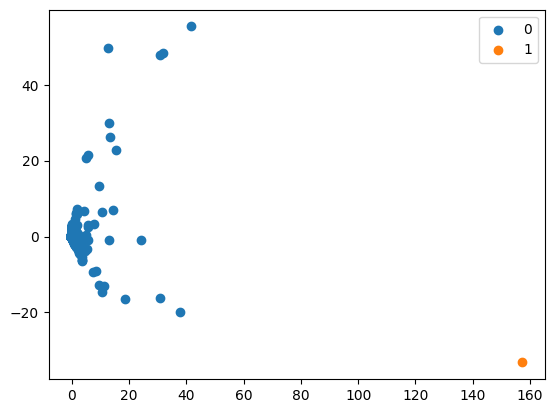

Number of data points in cluster 0: 11071
Number of data points in cluster 1: 1


In [183]:
# Visualize separation of model with 2 clusters

# Create model from reduced DF with 2 clusters
reduced_model, reduced_labels = getReducedLabels(k)

# Visualize cluster separation
createPCAgraph(reduced_labels)

# explore how many data points belong to each cluster
printClusterSize(reduced_labels, k)

In [184]:
testing = transaction_freq.copy()
testing['label'] = reduced_labels.tolist()

testing[testing['label'] == 1]

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received,label
0x32be343b94f860124dc4fee278fdcbd38c102d88,2408.0,64606.0,3.470512e+06,3.178077e+06,67014.0,1441.242364,49.191675,110502464.0,1.357149e+09,45889.727575,5.399249e-08,21006.54738,5.403992e-08,1


In [186]:
# fit KMeans model with 5 clusters
k = 5

centroids_df_5clusters = runModel(k)
print('\n')
centroids_df_5clusters

Silhouette score for model with 5 clusters: 0.9977857144206463
Number of data points in cluster 0: 11061
Number of data points in cluster 1: 3
Number of data points in cluster 2: 6
Number of data points in cluster 3: 1
Number of data points in cluster 4: 1




,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0,17.891149,24.250791,1.757959e+03,1780.154475,42.141940,3.710275e+02,466.292247,1.702766e+06,2.062168e+06,5.582228e+04,4.391928e-08,1.213124e+05,5.533238e-08
1,0.000000,2122.000000,2.273737e-13,38.947715,2122.000000,5.684342e-14,0.021196,9.313226e-10,4.747693e+09,0.000000e+00,0.000000e+00,2.318390e+06,5.032008e-08
2,13405.500000,318.666667,4.096919e+04,30.852187,13724.166667,1.336327e+00,5.948013,4.066045e+09,6.319833e+08,1.241702e+06,5.042821e-08,4.179907e+05,4.174928e-08
3,4011.000000,0.000000,1.110000e+01,0.000000,4011.000000,2.767390e-03,0.000000,1.202157e+10,0.000000e+00,2.997149e+06,6.005038e-08,0.000000e+00,0.000000e+00
4,0.000000,3951.000000,0.000000e+00,0.000000,3951.000000,0.000000e+00,0.000000,0.000000e+00,1.185300e+10,0.000000e+00,0.000000e+00,3.000000e+06,6.000000e-08


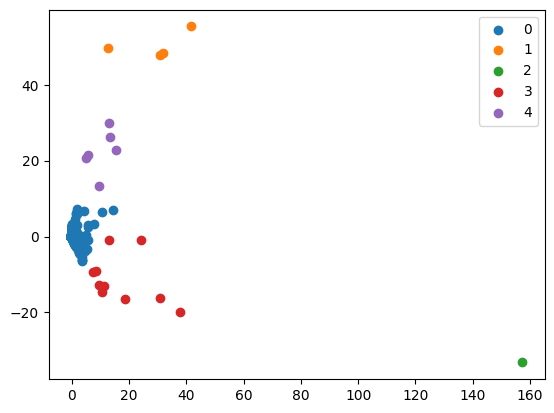

Number of data points in cluster 0: 11051
Number of data points in cluster 1: 4
Number of data points in cluster 2: 1
Number of data points in cluster 3: 10
Number of data points in cluster 4: 6


In [187]:
# Visualize separation of model with 5 clusters

# Create model from reduced DF with 5 clusters
reduced_model, reduced_labels = getReducedLabels(k)

# Visualize cluster separation
createPCAgraph(reduced_labels)

# explore how many data points belong to each cluster
printClusterSize(reduced_labels, k)

In [188]:
# fit KMeans model with 6 clusters
k = 6

centroids_df_6clusters = runModel(k)
print('\n')
centroids_df_6clusters

Silhouette score for model with 6 clusters: 0.9975631102489191
Number of data points in cluster 0: 11061
Number of data points in cluster 1: 1
Number of data points in cluster 2: 3
Number of data points in cluster 3: 5
Number of data points in cluster 4: 1
Number of data points in cluster 5: 1




,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0,17.891149,24.250791,1.757959e+03,1780.154475,42.14194,3.710275e+02,466.292247,1.702766e+06,2.062168e+06,5.582228e+04,4.391928e-08,1.213124e+05,5.533238e-08
1,3121.000000,1897.000000,3.163900e+01,40.613123,5018.00000,1.013746e-02,0.021409,6.242000e+09,3.790100e+09,2.000000e+06,5.000000e-08,1.997944e+06,5.000000e-08
2,0.000000,2122.000000,2.273737e-13,38.947715,2122.00000,5.684342e-14,0.021196,9.313226e-10,4.747693e+09,0.000000e+00,0.000000e+00,2.318390e+06,5.032008e-08
3,15462.400000,3.000000,4.915670e+04,28.900000,15465.40000,1.601564e+00,7.133333,3.630854e+09,3.600000e+05,1.090043e+06,5.051385e-08,1.020000e+05,4.009914e-08
4,4011.000000,0.000000,1.110000e+01,0.000000,4011.00000,2.767390e-03,0.000000,1.202157e+10,0.000000e+00,2.997149e+06,6.005038e-08,0.000000e+00,0.000000e+00
5,0.000000,3951.000000,0.000000e+00,0.000000,3951.00000,0.000000e+00,0.000000,0.000000e+00,1.185300e+10,0.000000e+00,0.000000e+00,3.000000e+06,6.000000e-08


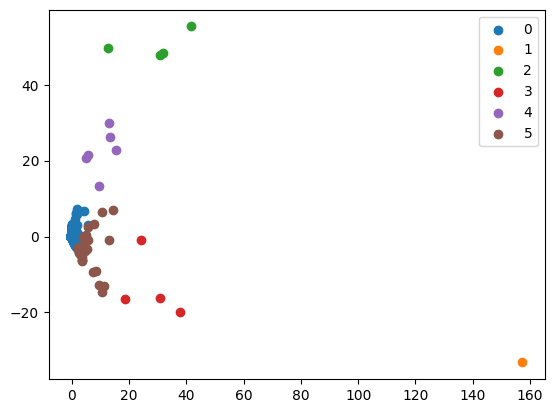

Number of data points in cluster 0: 11026
Number of data points in cluster 1: 1
Number of data points in cluster 2: 4
Number of data points in cluster 3: 4
Number of data points in cluster 4: 6
Number of data points in cluster 5: 31


In [189]:
# Visualize separation of model with 6 clusters

# Create model from reduced DF with 6 clusters
reduced_model, reduced_labels = getReducedLabels(k)

# Visualize cluster separation
createPCAgraph(reduced_labels)

# explore how many data points belong to each cluster
printClusterSize(reduced_labels, k)

In [190]:
# fit KMeans model with 8 clusters
k = 8

centroids_df_8clusters = runModel(k)
print('\n')
centroids_df_8clusters

Silhouette score for model with 8 clusters: 0.9930637869406337
Number of data points in cluster 0: 11046
Number of data points in cluster 1: 1
Number of data points in cluster 2: 3
Number of data points in cluster 3: 5
Number of data points in cluster 4: 1
Number of data points in cluster 5: 1
Number of data points in cluster 6: 7
Number of data points in cluster 7: 8




,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
0,11.836592,17.457541,1.410866e+03,1494.468627,29.294134,3.713985e+02,466.901239,9.769972e+05,1.515905e+06,5.516687e+04,4.393585e-08,1.205560e+05,5.535498e-08
1,3121.000000,1897.000000,3.163900e+01,40.613123,5018.000000,1.013746e-02,0.021409,6.242000e+09,3.790100e+09,2.000000e+06,5.000000e-08,1.997944e+06,5.000000e-08
2,0.000000,2122.000000,2.273737e-13,38.947715,2122.000000,5.684342e-14,0.021196,9.313226e-10,4.747693e+09,0.000000e+00,0.000000e+00,2.318390e+06,5.032008e-08
3,15462.400000,3.000000,4.915670e+04,28.900000,15465.400000,1.601564e+00,7.133333,3.630854e+09,3.600000e+05,1.090043e+06,5.051385e-08,1.020000e+05,4.009914e-08
4,4011.000000,0.000000,1.110000e+01,0.000000,4011.000000,2.767390e-03,0.000000,1.202157e+10,0.000000e+00,2.997149e+06,6.005038e-08,0.000000e+00,0.000000e+00
5,0.000000,3951.000000,0.000000e+00,0.000000,3951.000000,0.000000e+00,0.000000,0.000000e+00,1.185300e+10,0.000000e+00,0.000000e+00,3.000000e+06,6.000000e-08
6,8586.285714,1.571429,5.567703e+04,146.853822,8587.857143,3.681238e+00,29.579858,1.119221e+09,2.867143e+05,1.144305e+06,5.311236e-08,6.960000e+04,2.154131e-08
7,880.375000,9423.875000,4.338271e+05,397670.026733,10304.250000,1.801581e+02,7.549371,2.597968e+07,7.578678e+08,8.361216e+03,1.299906e-08,1.210981e+06,5.369625e-08


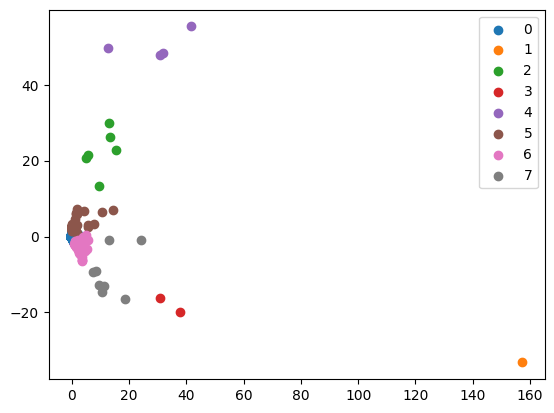

Number of data points in cluster 0: 10900
Number of data points in cluster 1: 1
Number of data points in cluster 2: 6
Number of data points in cluster 3: 2
Number of data points in cluster 4: 4
Number of data points in cluster 5: 90
Number of data points in cluster 6: 61
Number of data points in cluster 7: 8


In [191]:
# Visualize separation of model with 8 clusters

# Create model from reduced DF with 8 clusters
reduced_model, reduced_labels = getReducedLabels(k)

# Visualize cluster separation
createPCAgraph(reduced_labels)

# explore how many data points belong to each cluster
printClusterSize(reduced_labels, k)

In [176]:
testing = transaction_freq.copy()

testing['label'] = reduced_labels.tolist()

testing[testing['label'] == 1]

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received,label
0x32be343b94f860124dc4fee278fdcbd38c102d88,2408.0,64606.0,3.470512e+06,3.178077e+06,67014.0,1441.242364,49.191675,110502464.0,1.357149e+09,45889.727575,5.399249e-08,21006.54738,5.403992e-08,1


In [177]:
testing[testing['label'] == 6]

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received,label
0x0034cf6e02f4c47fb30df22fc81b8dedddbf1fb0,5.0,4.0,26639.500000,75667.500500,9.0,5327.900000,18916.875125,105000.0,153000.0,21000.0,5.000000e-08,38250.0,5.000000e-08,6
0x005864ea59b094db9ed88c05ffba3d3a3410592b,4.0,2.0,74448.990000,74449.000000,6.0,18612.247500,37224.500000,84000.0,111000.0,21000.0,5.000000e-08,55500.0,5.000000e-08,6
0x06f099a7d789f10b0c1c1f069638ba25b2bf8483,4.0,1.0,1104.000000,59751.000000,5.0,276.000000,59751.000000,84000.0,90000.0,21000.0,5.000000e-08,90000.0,5.000000e-08,6
0x0abfb39b11486d79572866195ba26c630b6784db,1.0,0.0,121499.900000,0.000000,1.0,121499.900000,0.000000,50000.0,0.0,50000.0,1.171603e-06,0.0,0.000000e+00,6
0x0b12c5618eb8bfc23b8893780f1100d1b668639a,7.0,2.0,85581.227000,28248.990000,9.0,12225.889571,14124.495000,147000.0,200000.0,21000.0,5.000000e-08,100000.0,5.000000e-08,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xf75e354c5edc8efed9b59ee9f67a80845ade7d0c,0.0,1.0,0.000000,82348.000000,1.0,0.000000,82348.000000,0.0,90000.0,0.0,0.000000e+00,90000.0,5.000000e-08,6
0xfd7c9117bbeb649d9b37b3d3c9917f7c12f526b3,106.0,120.0,92168.580068,92168.696408,226.0,869.514906,768.072470,2226000.0,8325000.0,21000.0,5.226415e-08,69375.0,2.187500e-07,6
0xfe9ccd888dfcda8910fb47f492193664ca0ab237,0.0,2.0,0.000000,98818.002000,2.0,0.000000,49409.001000,0.0,219244.0,0.0,0.000000e+00,109622.0,5.000000e-08,6
0xff7843c7010aa7e61519b762dfe49124a76b0e4e,3.0,0.0,356400.000000,0.000000,3.0,118800.000000,0.000000,150000.0,0.0,50000.0,1.171603e-06,0.0,0.000000e+00,6


In [178]:
components_matrix = pd.DataFrame(
    pca.components_, 
    columns=transaction_freq.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

components_matrix

,from_frequency,to_frequency,from_val_total,to_val_total,total_frequency,avg_value_sent,avg_value_received,from_gas_total,to_gas_total,avg_gas_sent,avg_gas_price_sent,avg_gas_received,avg_gas_price_received
PC1,0.227240,0.493752,0.443918,0.468612,0.502017,0.059399,0.079658,0.114111,0.112266,0.017947,0.003105,0.007441,0.002001
PC2,0.593678,-0.179362,-0.226093,-0.287790,0.275643,-0.137671,-0.199235,0.539871,0.077956,0.217066,-0.004955,0.044992,-0.010154
